In [110]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


Note: you may need to restart the kernel to use updated packages.


Importing Data Through CSV File


In [80]:
df = pd.read_csv('titanic_train_5c8b4db5-b8d9-466e-9f85-9975a280369d.csv')
# Map numeric Pclass values to descriptive strings
df['Pclass'] = df['Pclass'].map({
    1: '1st class',
    2: '2nd class',
    3: '3rd class'
})


In [81]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3rd class,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1st class,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3rd class,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3rd class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2nd class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [82]:
df.shape

(891, 12)

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # median is better for skewed data


C:\Users\DeLL\AppData\Local\Temp\ipykernel_12852\2189423605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # median is better for skewed data


In [85]:
df.drop(columns=['Cabin'], inplace=True)

In [86]:
df = df.dropna(subset=['Embarked'])


In [87]:
df[df.duplicated(subset=['Name', 'Ticket'])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


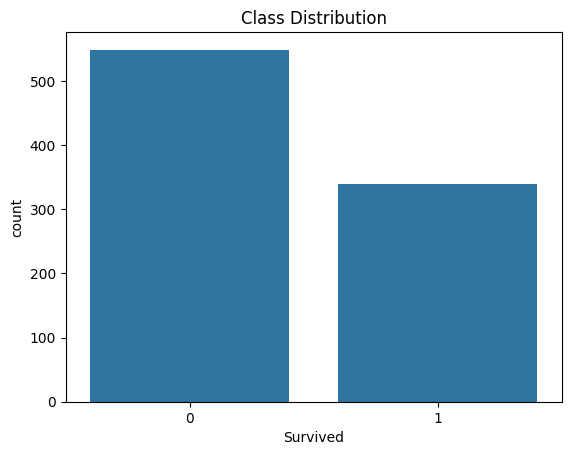

In [94]:
sns.countplot(x='Survived', data=df)
plt.title("Class Distribution")
plt.show()

Checking Type of Attribute

In [88]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


Mean, Median, Standard Deviation and Range of Every Attribute that Possible 

In [89]:
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.315152,0.524184,0.382452,32.096681
std,12.984932,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


<Axes: >

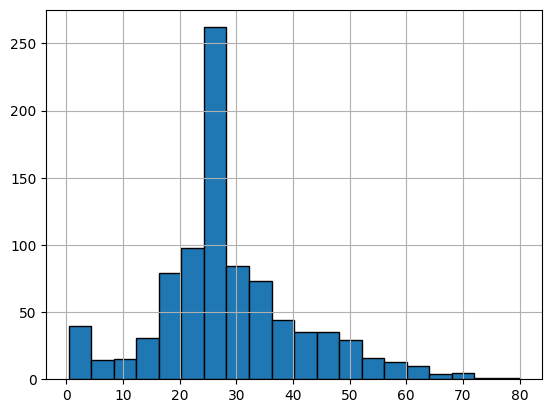

In [90]:
df.Age.hist(bins=20, edgecolor='black')

<Axes: ylabel='Sex'>

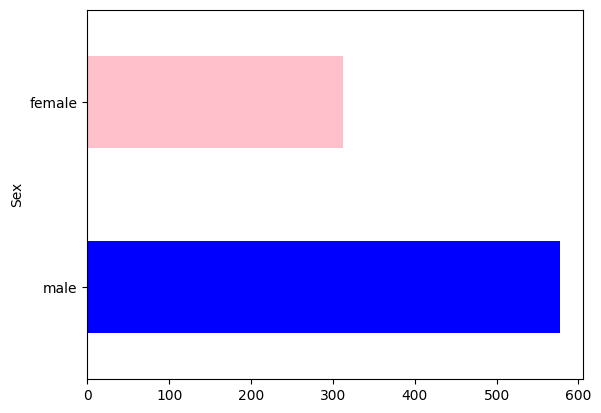

In [91]:
df.Sex.value_counts().plot(kind='barh', color=['blue', 'pink'])

<Axes: ylabel='Pclass'>

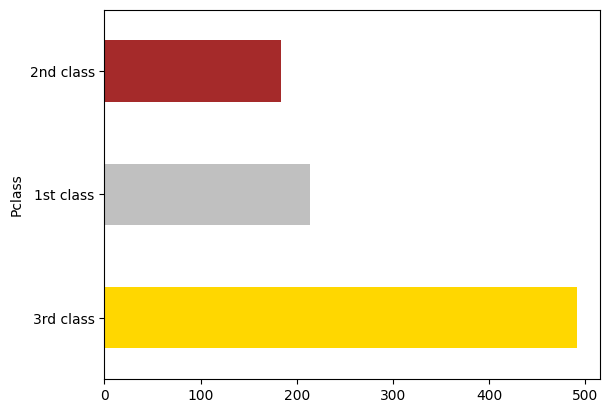

In [92]:
df['Pclass'].value_counts().plot(kind='barh', color=['gold', 'silver', 'brown'])

Text(0.5, 0, 'Survival Rate')

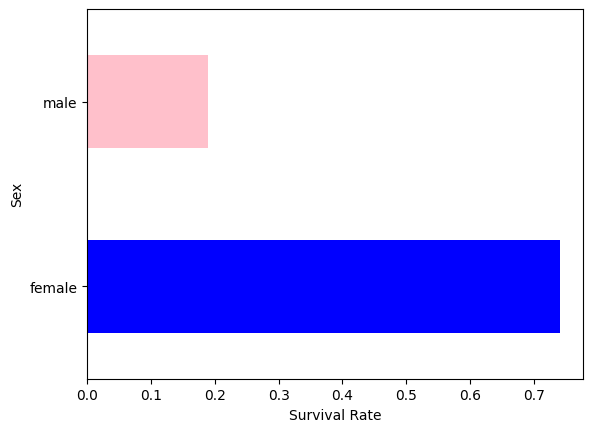

In [93]:
pd.concat([df['Sex'], df['Survived']], axis=1).groupby('Sex')['Survived'].mean().plot(kind='barh', color=['blue', 'pink']).set_xlabel('Survival Rate')

 After analyzing this information we should notice that:
- The majority of passengers are in their 20's or 30's
- The majority of passengers are male
- The majority of passengers are "Third" class
- Females have a much higher chance of survival 

#  Boxplot
Purpose: Detect outliers and compare distributions across categories

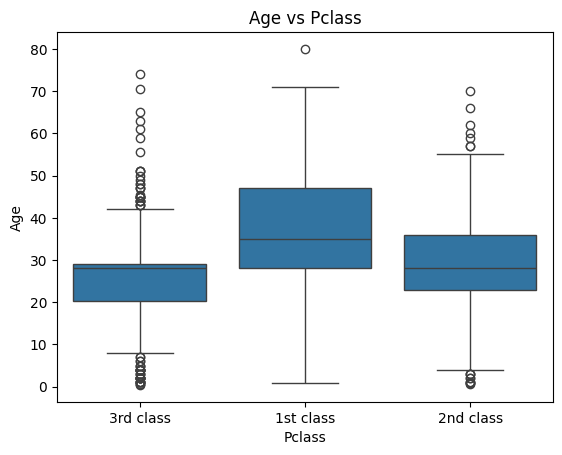

In [97]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age vs Pclass')
plt.show()

<Axes: xlabel='Sex', ylabel='Fare'>

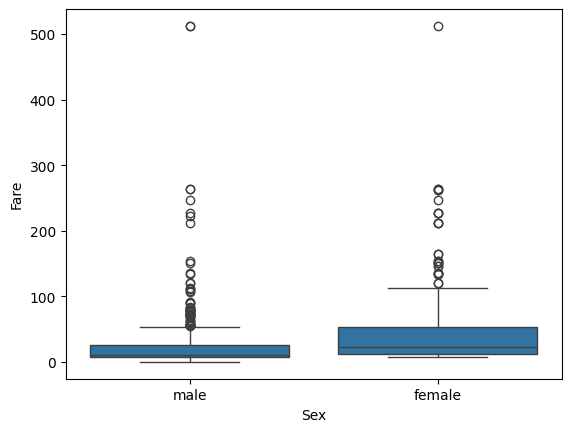

In [98]:
sns.boxplot(x='Sex', y='Fare', data=df)

# QQ Plot (Quantile-Quantile Plot)
Purpose: Check if a feature is normally distributed

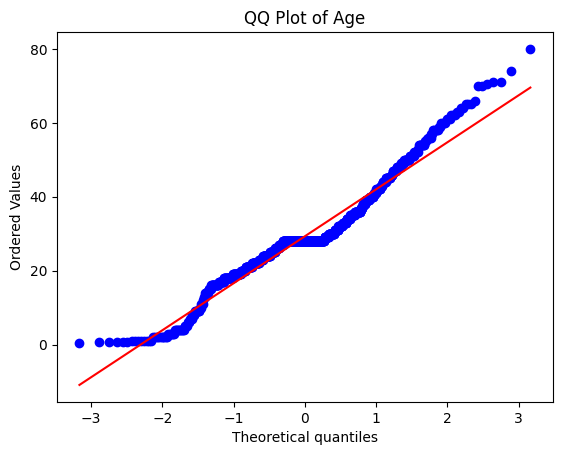

In [99]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Age'].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Age")
plt.show()


# Countplot
Purpose: Show class imbalance or category counts

Text(0.5, 1.0, 'Survival Counts')

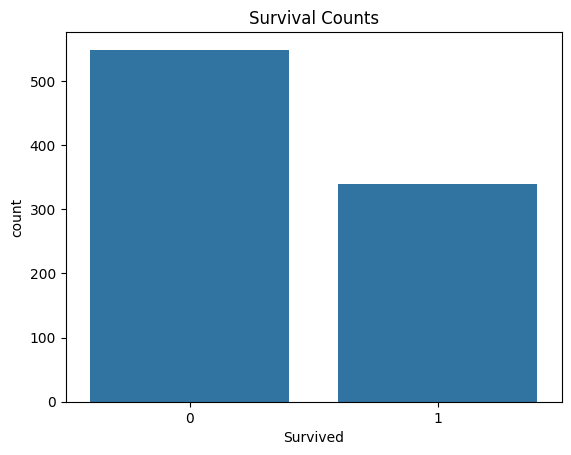

In [101]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')


<Axes: xlabel='Embarked', ylabel='count'>

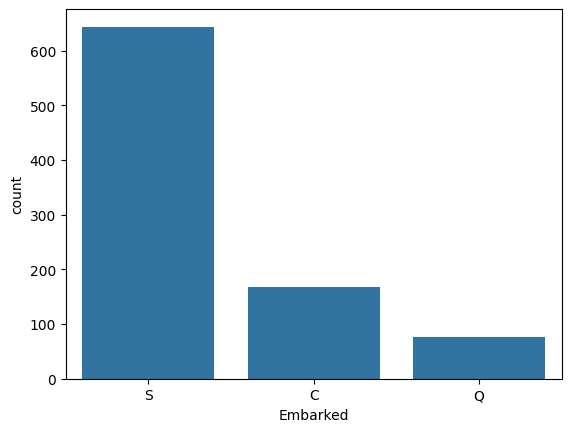

In [102]:
sns.countplot(x='Embarked', data=df)


#  Pairplot (Seaborn)
Purpose: Scatter plots between numerical variables

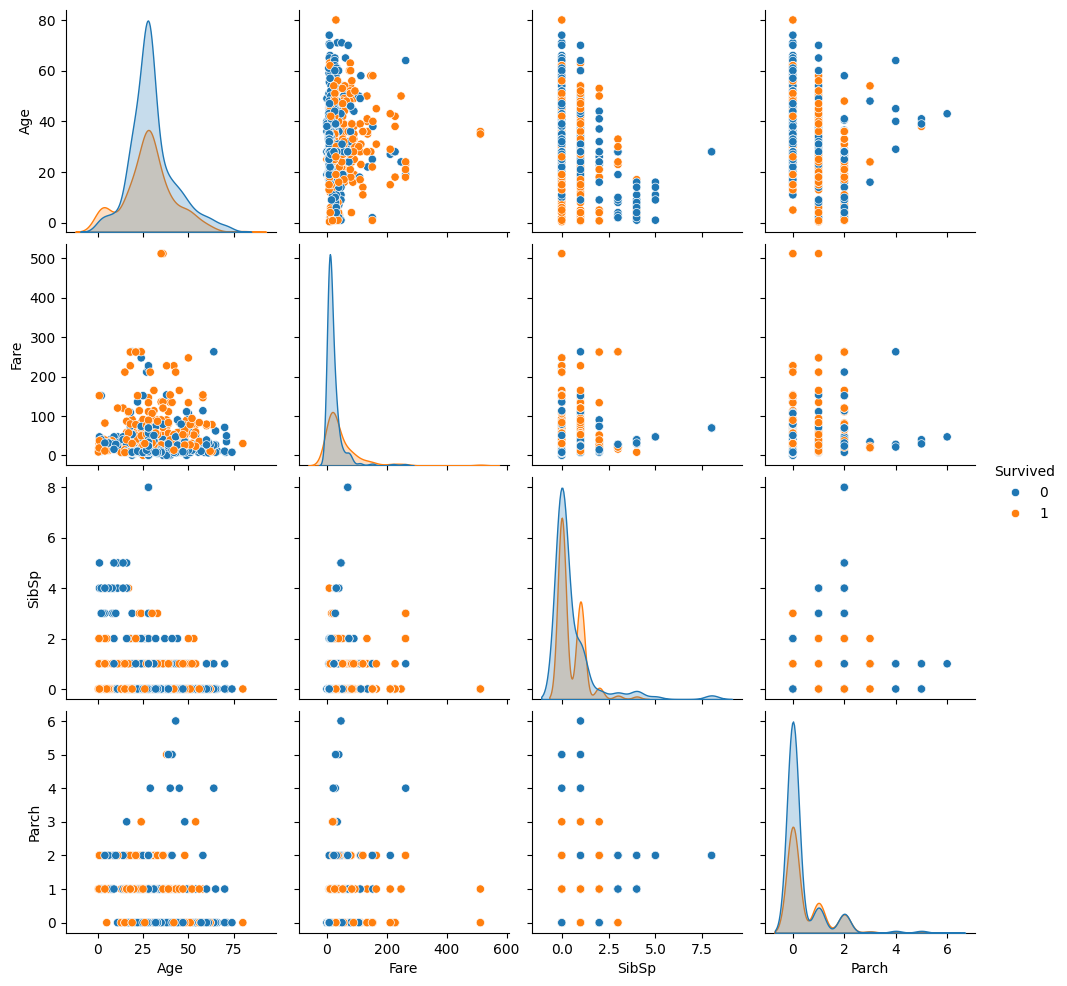

In [103]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')


# Heatmap (Correlation)
Purpose: See correlation between numerical features

Text(0.5, 1.0, 'Feature Correlation Heatmap')

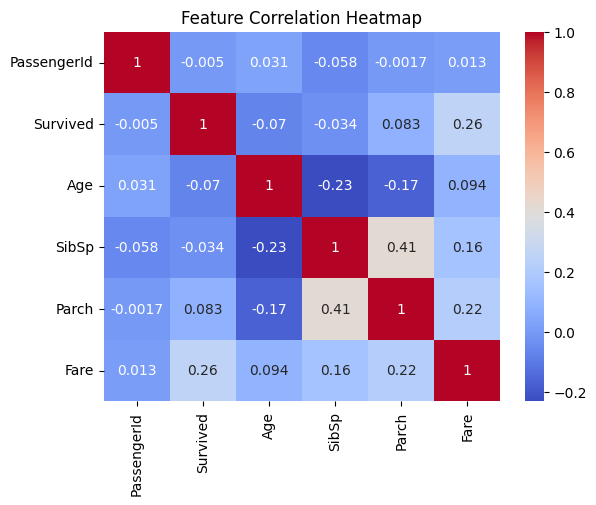

In [105]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')


# Violin Plot
Purpose: Distribution + boxplot in one — especially good for comparing categories

<Axes: xlabel='Pclass', ylabel='Age'>

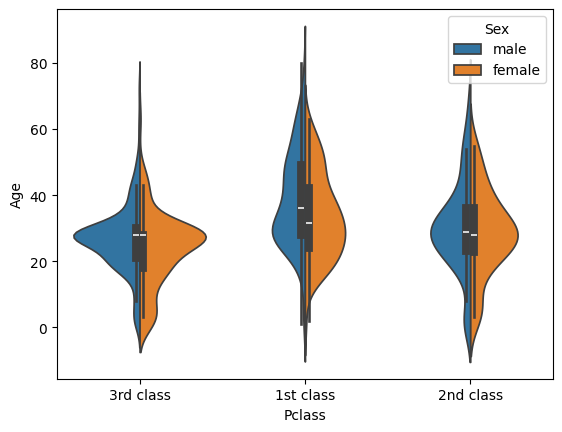

In [108]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Sex', split=True)


<Axes: xlabel='Fare', ylabel='Count'>

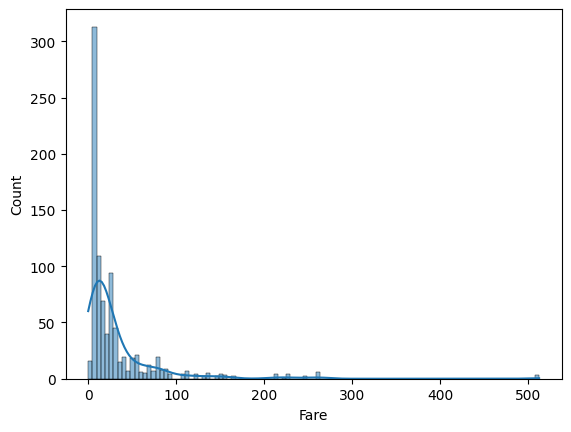

In [109]:
sns.histplot(df['Fare'], kde=True)


# Chi-square Test

- for Sex vs Survived

In [111]:

# Contingency table
ct = pd.crosstab(df['Sex'], df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2 Stat: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null: Variables are independent.")


Chi2 Stat: 258.4266104463763
P-value: 3.7799096665576e-58
Degrees of Freedom: 1
Expected Table:
[[192.67491564 119.32508436]
 [356.32508436 220.67491564]]
Reject null hypothesis: Variables are dependent.


- For Pclass vs Survived

In [113]:
# Contingency table
ct = pd.crosstab(df['Pclass'], df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2 Stat: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null: Variables are independent.")


Chi2 Stat: 100.98040726128336
P-value: 1.1813624785477922e-22
Degrees of Freedom: 2
Expected Table:
[[132.1552306  81.8447694]
 [113.6287964  70.3712036]
 [303.215973  187.784027 ]]
Reject null hypothesis: Variables are dependent.


- For Embarked vs Survived

In [114]:
# Contingency table
ct = pd.crosstab(df['Embarked'], df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2 Stat: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null: Variables are independent.")

Chi2 Stat: 26.48914983923762
P-value: 1.769922284120912e-06
Degrees of Freedom: 2
Expected Table:
[[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]
Reject null hypothesis: Variables are dependent.


In [115]:
# Contingency table
ct = pd.crosstab(df['Pclass'], df['Embarked'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2 Stat: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Variables are dependent.")
else:
    print("Fail to reject null: Variables are independent.")

Chi2 Stat: 123.75190952951289
P-value: 8.435267819894384e-26
Degrees of Freedom: 4
Expected Table:
[[ 40.44094488  18.53543307 155.02362205]
 [ 34.77165354  15.93700787 133.29133858]
 [ 92.78740157  42.52755906 355.68503937]]
Reject null hypothesis: Variables are dependent.


In [116]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Step 1: Select only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Step 2: Add manually those categorical-like numeric columns if needed
categorical_cols += ['Pclass', 'Survived']  # if they are int type, not object

# Step 3: Run chi-square test for all unique pairs
print("Chi-Square Test Results:\n")
for col1, col2 in combinations(categorical_cols, 2):
    try:
        ct = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(ct)

        print(f"🔹 Pair: {col1} vs {col2}")
        print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, DoF: {dof}")
        if p < 0.05:
            print("➡️ Significant: Variables are likely dependent (reject H₀)")
        else:
            print("➡️ Not Significant: Variables may be independent (fail to reject H₀)")
        print("-" * 50)
    except Exception as e:
        print(f"❌ Could not compute {col1} vs {col2} due to error: {e}")


Chi-Square Test Results:

🔹 Pair: Pclass vs Name
Chi2: 1778.0000, p-value: 0.4822, DoF: 1776
➡️ Not Significant: Variables may be independent (fail to reject H₀)
--------------------------------------------------
🔹 Pair: Pclass vs Sex
Chi2: 16.1405, p-value: 0.0003, DoF: 2
➡️ Significant: Variables are likely dependent (reject H₀)
--------------------------------------------------
🔹 Pair: Pclass vs Ticket
Chi2: 1778.0000, p-value: 0.0000, DoF: 1358
➡️ Significant: Variables are likely dependent (reject H₀)
--------------------------------------------------
🔹 Pair: Pclass vs Embarked
Chi2: 123.7519, p-value: 0.0000, DoF: 4
➡️ Significant: Variables are likely dependent (reject H₀)
--------------------------------------------------
🔹 Pair: Pclass vs Pclass
Chi2: 1778.0000, p-value: 0.0000, DoF: 4
➡️ Significant: Variables are likely dependent (reject H₀)
--------------------------------------------------
🔹 Pair: Pclass vs Survived
Chi2: 100.9804, p-value: 0.0000, DoF: 2
➡️ Significant: V

In [117]:
from scipy.stats import chi2_contingency
from itertools import combinations

# Unique list of categorical columns
categorical_cols = list(set(df.select_dtypes(include='object').columns.tolist() + ['Pclass', 'Survived']))

print("Chi-Square Test Results:\n")
for col1, col2 in combinations(categorical_cols, 2):
    try:
        ct = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(ct)

        print(f"🔹 Pair: {col1} vs {col2}")
        print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, DoF: {dof}")
        print("Expected Frequencies:")
        print(pd.DataFrame(expected, index=ct.index, columns=ct.columns))

        if p < 0.05:
            print("➡️ Significant: Variables are likely dependent (reject H₀)")
        else:
            print("➡️ Not Significant: Variables may be independent (fail to reject H₀)")
        print("-" * 60)
    except Exception as e:
        print(f"❌ Could not compute {col1} vs {col2} due to error: {e}")


Chi-Square Test Results:

🔹 Pair: Ticket vs Pclass
Chi2: 1778.0000, p-value: 0.0000, DoF: 1358
Expected Frequencies:
Pclass       1st class  2nd class  3rd class
Ticket                                      
110152         0.72216   0.620922   1.656918
110413         0.72216   0.620922   1.656918
110465         0.48144   0.413948   1.104612
110564         0.24072   0.206974   0.552306
110813         0.24072   0.206974   0.552306
...                ...        ...        ...
W./C. 6608     0.96288   0.827897   2.209224
W./C. 6609     0.24072   0.206974   0.552306
W.E.P. 5734    0.24072   0.206974   0.552306
W/C 14208      0.24072   0.206974   0.552306
WE/P 5735      0.48144   0.413948   1.104612

[680 rows x 3 columns]
➡️ Significant: Variables are likely dependent (reject H₀)
------------------------------------------------------------
🔹 Pair: Ticket vs Sex
Chi2: 656.2104, p-value: 0.7282, DoF: 679
Expected Frequencies:
Sex            female      male
Ticket                         
1101

In [118]:
# Step 1: Get categorical columns
categorical_cols = list(set(df.select_dtypes(include='object').columns.tolist() + ['Pclass', 'Survived']))

# Step 2: Initialize empty DataFrames for p-values and chi²
pval_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Step 3: Compute Chi-square tests
for col1, col2 in combinations(categorical_cols, 2):
    try:
        ct = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(ct)
        
        pval_matrix.loc[col1, col2] = p
        pval_matrix.loc[col2, col1] = p

        chi2_matrix.loc[col1, col2] = chi2
        chi2_matrix.loc[col2, col1] = chi2
    except:
        continue

# Convert to float
pval_matrix = pval_matrix.astype(float)
chi2_matrix = chi2_matrix.astype(float)


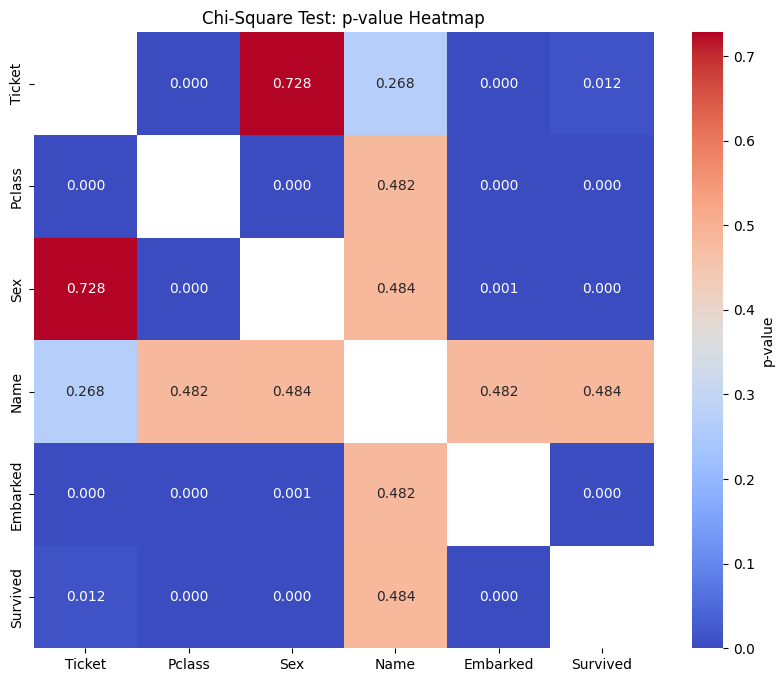

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(pval_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'p-value'})
plt.title('Chi-Square Test: p-value Heatmap')
plt.show()


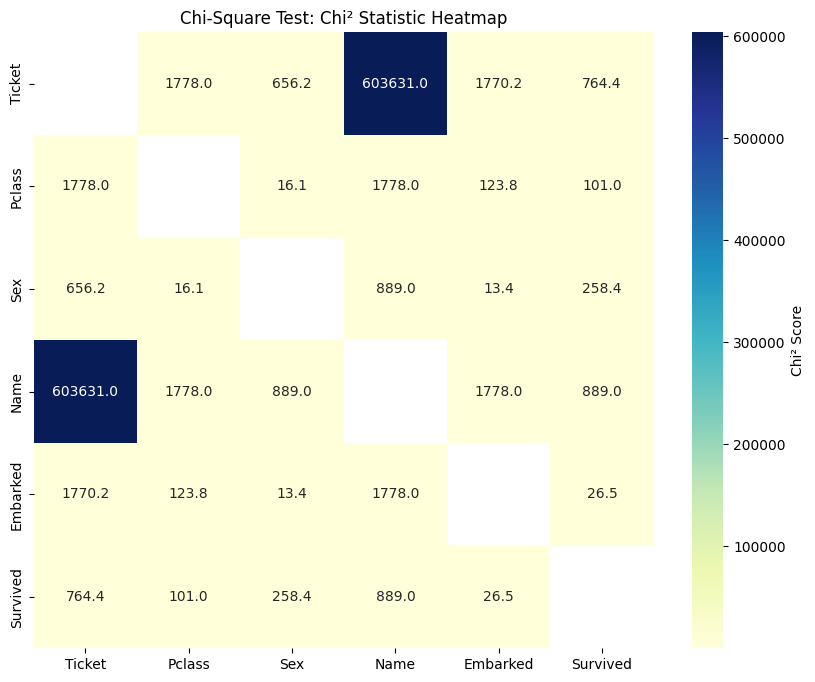

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Chi² Score'})
plt.title('Chi-Square Test: Chi² Statistic Heatmap')
plt.show()


#  Survival by Sex

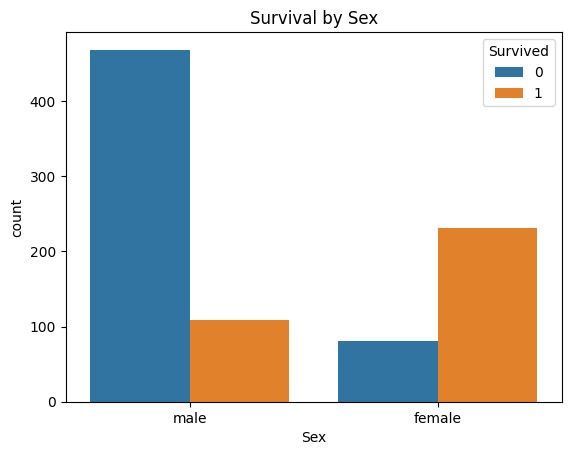

In [121]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()


Observation:

Females had a much higher survival rate.

In [122]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

# Survival by Pclass

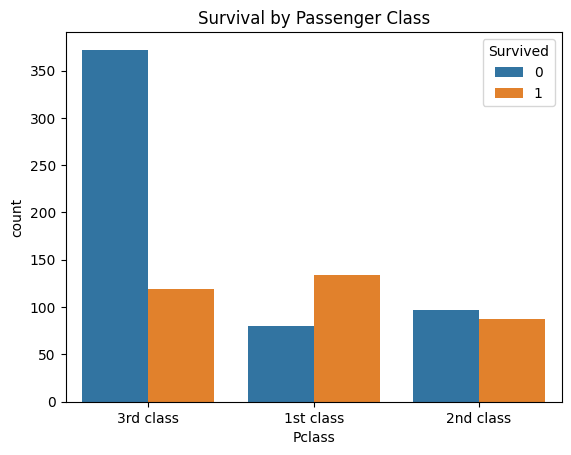

In [123]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


Observation:

1st class passengers survived more than 2nd and 3rd.

In [124]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1st class    0.626168
2nd class    0.472826
3rd class    0.242363
Name: Survived, dtype: float64

# Survival by Age

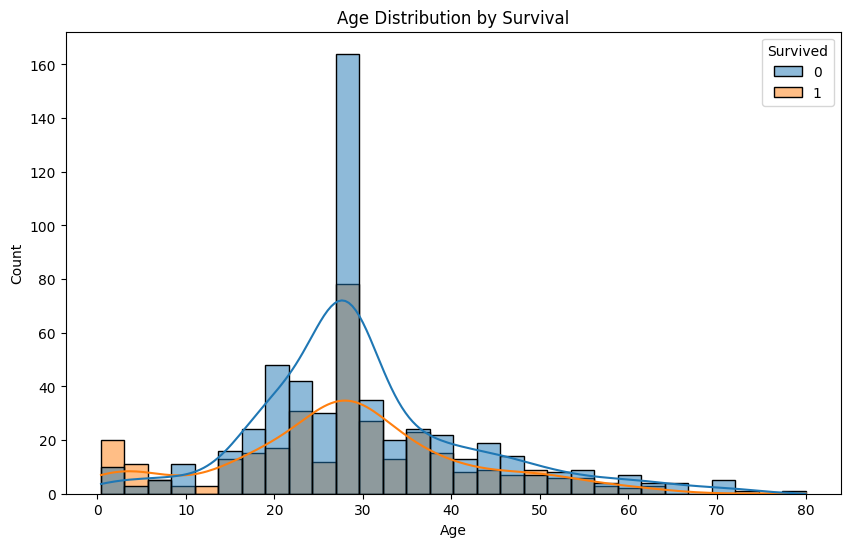

In [125]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


Observation:

Children and young adults had a slightly higher chance of survival.

# Survival by Fare

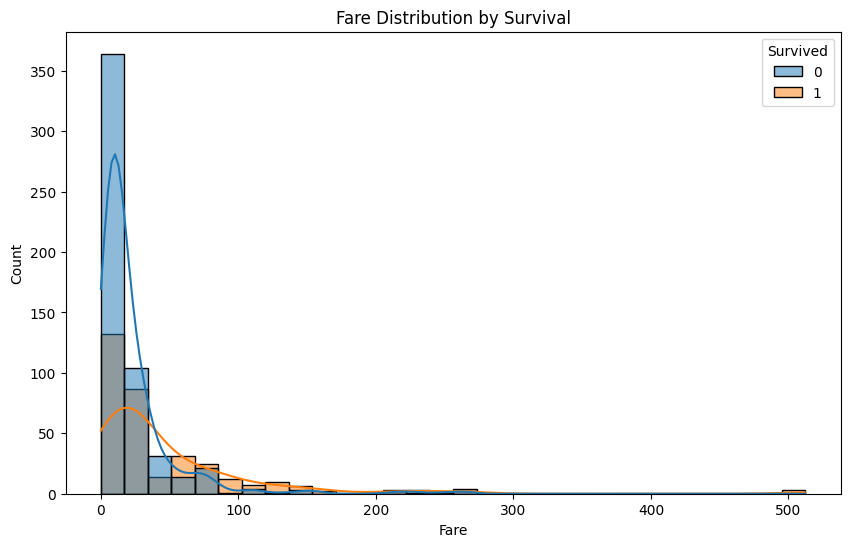

In [126]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Fare Distribution by Survival')
plt.show()


Observation:

People who paid higher fares (rich passengers) survived more.

# Survival by Embarked Port

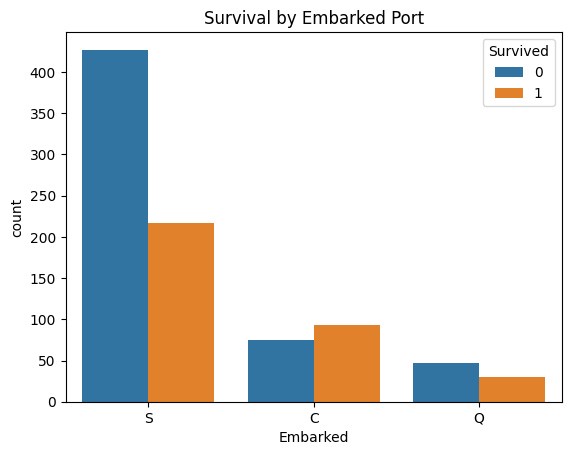

In [127]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()


Observation:

Passengers from port C (Cherbourg) had higher survival.

In [128]:
df.groupby('Embarked')['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

# Survival by Family Size

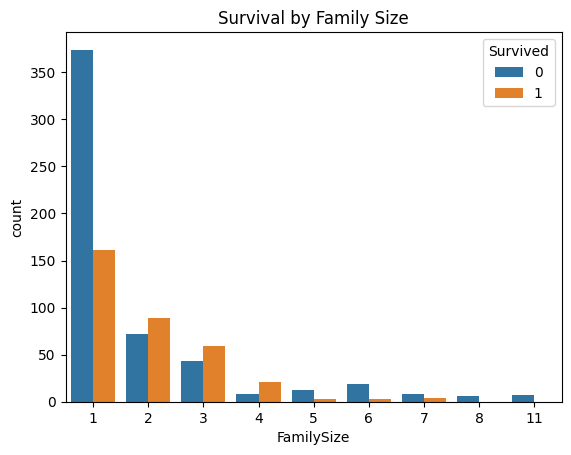

In [129]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()


Observation:

Very large families (>4) and people traveling alone had lower survival.

# Summary Table

In [130]:
# Grouping survival rates by multiple attributes
summary = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(summary)


Pclass  1st class  2nd class  3rd class
Sex                                    
female   0.967391   0.921053   0.500000
male     0.368852   0.157407   0.135447
